In [6]:
#Set the working directory
#setwd("C:/Users/James Twose/Google Drive/Neurokeys/Vocal analysis add on")
setwd("/home/james/Data_Science")
library(casnet)

mjfdf <- read.table("monojformant.txt", header = TRUE)
djfdf <- read.table("dynamojformant.txt", header = TRUE)

In [3]:
#subset formant of interest
mjfdfs <- mjfdf[1:1150, c(1, 3)]
djfdfs <- djfdf[1:1150, c(1, 3)]

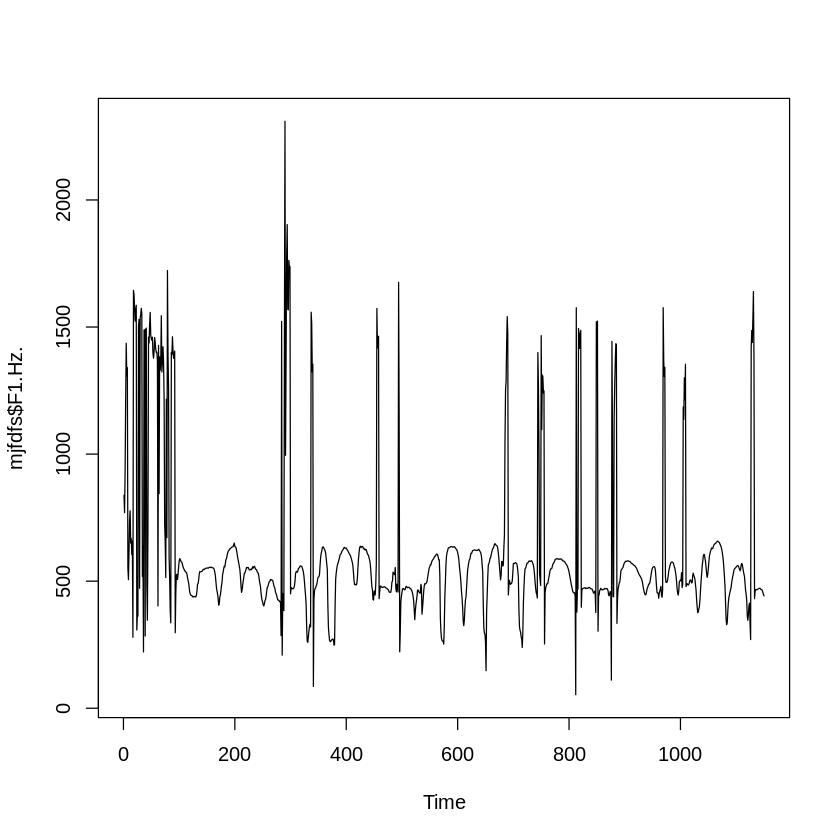

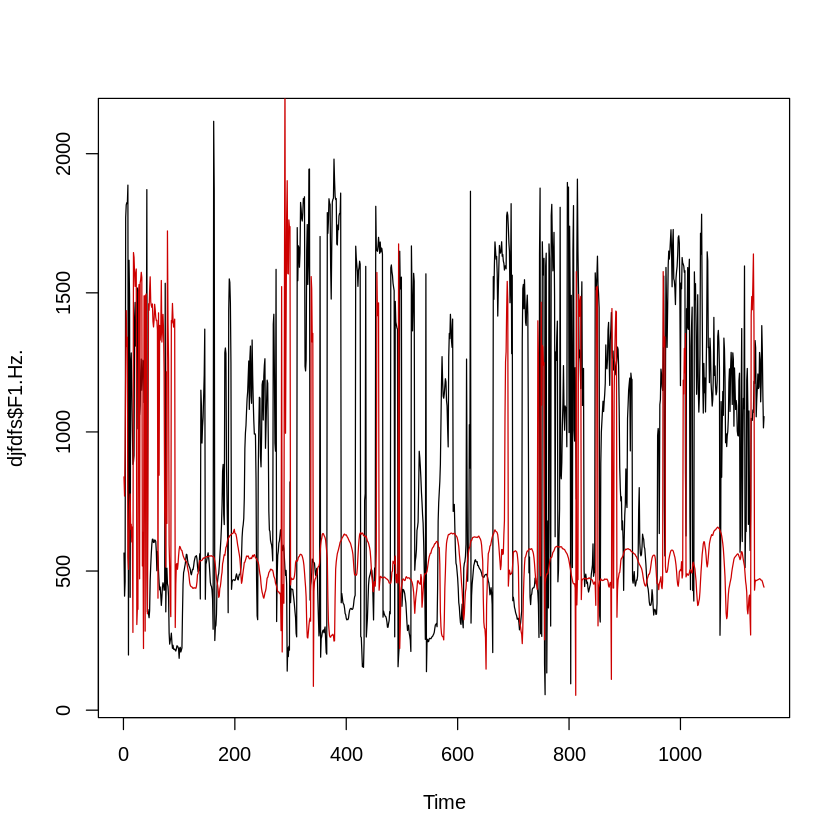

In [4]:
#plot the time series
plot.ts(mjfdfs$F1.Hz.)
plot.ts(djfdfs$F1.Hz.)
lines(ts(mjfdfs$F1.Hz.),col="red3")

In [7]:
#scale the time series using elascer
mjfdfse <- mjfdfs
djfdfse <- djfdfs
names(mjfdfse) = c("time", "f1")
names(djfdfse) = c("time","f1")
mjfdfse$f1e <- elascer(mjfdfse$f1)
djfdfse$f1e <- elascer(djfdfse$f1)
mjfdfse <- mjfdfse[, c(1, 3)]
djfdfse <- djfdfse[, c(1, 3)]

In [8]:
#determine delay (emlag) and embedding dimension (emdim) - monotone voice
#choose lags and dimensions from optimum lag, here this is based on first minimum
#with the corresponding dimension based on the first dimension below 10% nearest neighbour
emLag1 <- est_emLag(mjfdfse$f1e)[1, 2]
emDim1 <- est_emDim(mjfdfse$f1e, delay = emLag1)[1, 2]

In [9]:
# Embed the time series - out of curiosity
mjfdfse_emb <- ts_embed(y=mjfdfse$f1e,emLag = emLag1, emDim = emDim1)
rgl::plot3d(mjfdfse_emb, type="l")

In [10]:
#find the radius
(emRad1 <- crqa_radius(y1 = mjfdfse$f1e, emLag = emLag1, emDim = emDim1)$Radius)


Auto-recurrence: Setting diagonal to (1 + max. distance) for analyses


lower and upper are both 0 (no band, just diagonal)
 using: diag(mat) <- 2.3698...



Searching for a radius that will yield 0.05 for RR 



Converged! Found an appropriate radius...


[1] 0.1648265

In [11]:
#determine delay (emlag) and embedding dimension (emdim) - dynamic voice
#choose lags and dimensions from optimum lag, here this is based on first minimum
#with the corresponding dimension based on the first dimension below 10% nearest neighbour
emLag2 <- est_emLag(djfdfse$f1e)[1, 2]
emDim2 <- est_emDim(djfdfse$f1e, delay = emLag2)[1, 2]

In [12]:
# Embed the time series - out of curiosity
djfdfse_emb <- ts_embed(y=djfdfse$f1e,emLag = emLag2, emDim = emDim2)
rgl::plot3d(djfdfse_emb, type="l")

In [13]:
#find the radius
(emRad2 <- crqa_radius(y1 = djfdfse$f1e, emLag = emLag2, emDim = emDim2)$Radius)


Auto-recurrence: Setting diagonal to (1 + max. distance) for analyses


lower and upper are both 0 (no band, just diagonal)
 using: diag(mat) <- 3.2392...



Searching for a radius that will yield 0.05 for RR 



Converged! Found an appropriate radius...


[1] 0.812718

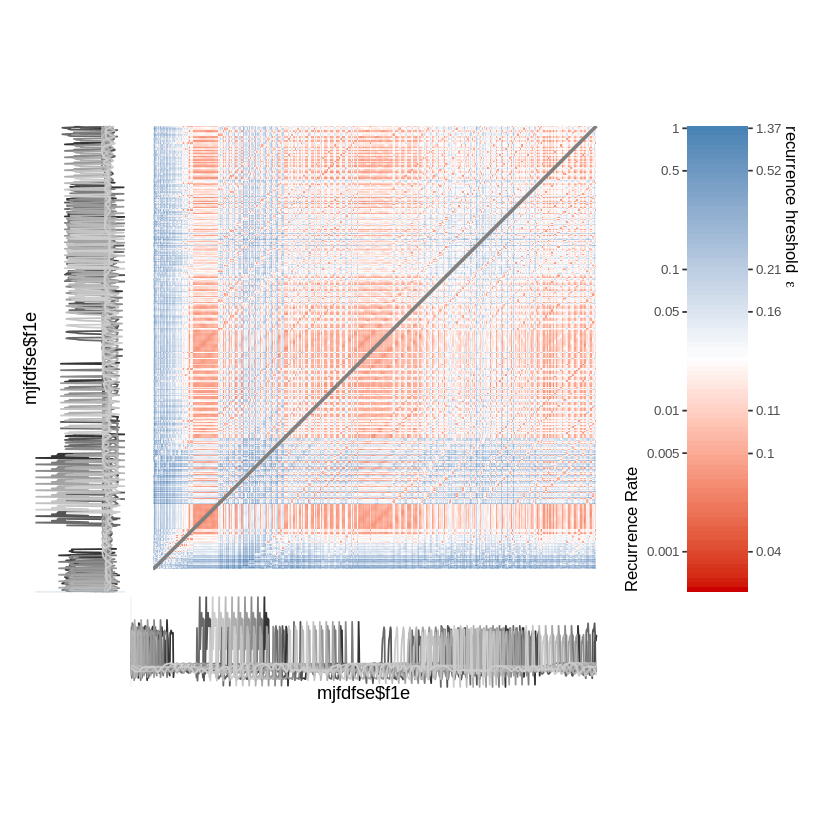

In [14]:
#RQA plot mono
# Unthresholded matrices (no radius applied)
rmmono <- rp(y1 = mjfdfse$f1e, emDim = emDim1, emLag = emLag1, emRad = NULL)
# plot it - mono
rp_plot(rmmono, plotDimensions = TRUE, plotMeasures = FALSE)

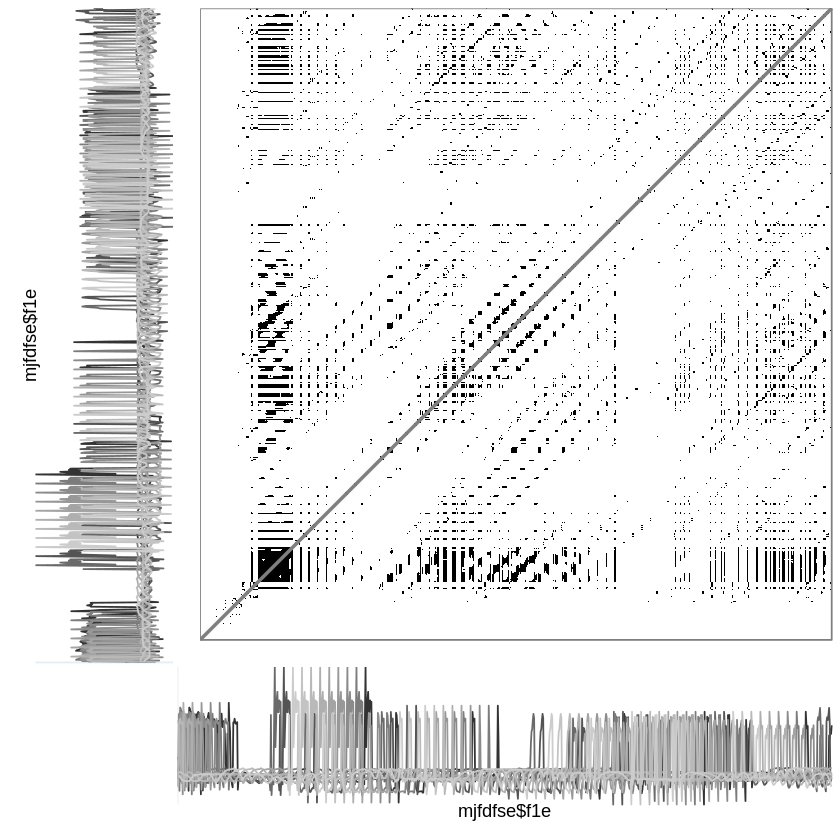

In [15]:
# Now threshold using the radius
rmmonoth <- rp(y1 = mjfdfse$f1e, emDim = emDim1, emLag = emLag1, emRad = emRad1)
rp_plot(rmmonoth, plotDimensions = TRUE, plotMeasures = FALSE)

In [16]:
#determinism and laminarity results
(out <- crqa_cl(mjfdfse$f1e, emDim = emDim1, emLag = emLag1, emRad = emRad1))


~~~o~~o~~casnet~~o~~o~~~

Performing auto-RQA

...using sequential processing...
  |                                                                     |   0%

ERROR: Error in system(full, intern = quiet, ignore.stderr = quiet, ...): cannot popen ''/usr/lib/R/bin/R' --no-site-file --no-environ --no-save --no-restore --quiet CMD ./rp -i '/tmp/RtmpssabP4/file486c4fa5a32d.dat' -r '/tmp/RtmpssabP4\RQAplot_0.txt' -o '/tmp/RtmpssabP4\RQAmeasures_0.txt' -p '/tmp/RtmpssabP4\RQAhist_diag_0.txt' -q '/tmp/RtmpssabP4\RQAhist_hori_0.txt' -m 11 -t 14 -e 0.16482645448267 -l 2 -v 2 -w 1 -n 'EUCLIDEAN' -s 2>/dev/null', probable reason 'Cannot allocate memory'


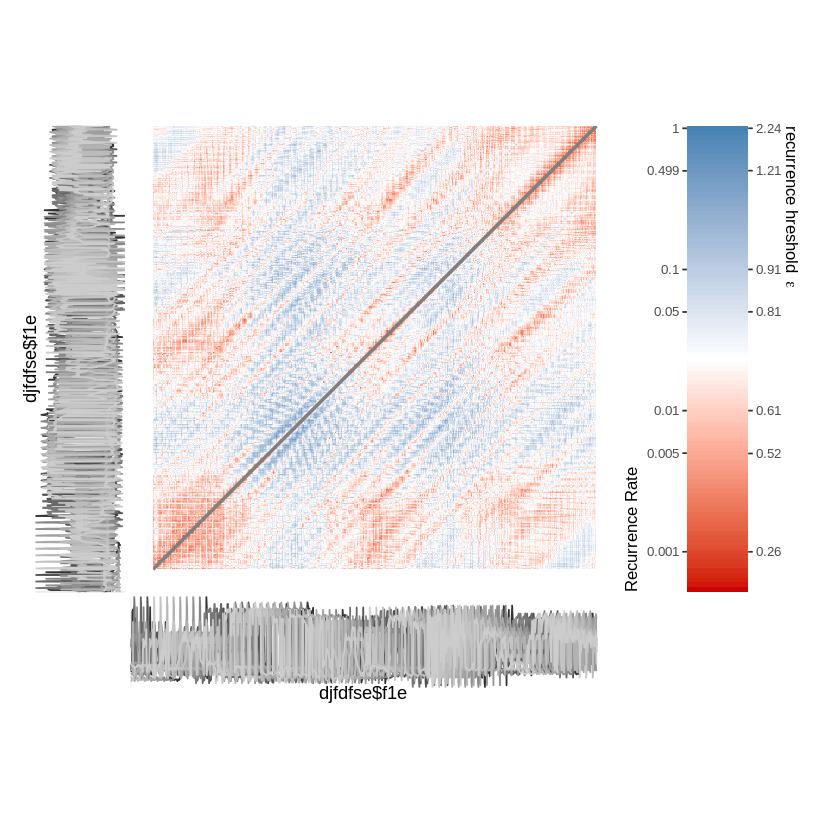

In [17]:
#RQA plot dynamic
# Unthresholded matrices (no radius applied)
rmdyn <- rp(y1 = djfdfse$f1e, emDim = emDim2, emLag = emLag2, emRad = NULL)
# plot it - mono
rp_plot(rmdyn, plotDimensions = TRUE, plotMeasures = FALSE)

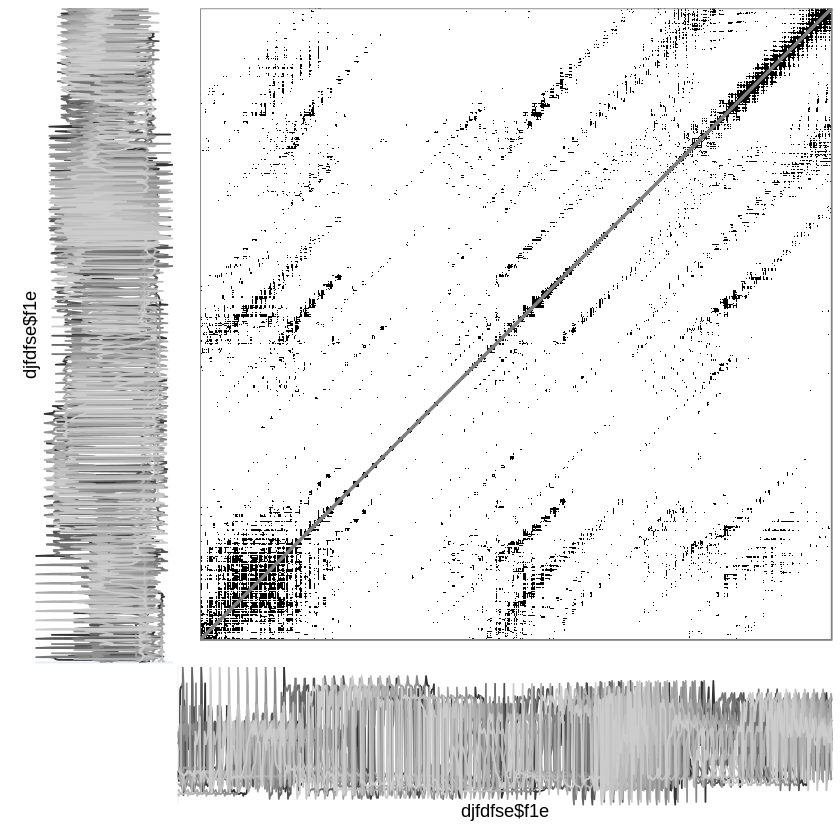

In [18]:
# Now threshold using the radius
rmdynth <- rp(y1 = djfdfse$f1e, emDim = emDim2, emLag = emLag2, emRad = emRad2)
rp_plot(rmdynth, plotDimensions = TRUE, plotMeasures = FALSE)